In [1]:
import nltk

In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount= True)

KeyboardInterrupt: ignored

In [ ]:
import pandas as pd

In [ ]:
speech = pd.read_csv('train.txt', '\t', names = ['id', 'speech', 'label'])

In [ ]:
dataset = speech.to_csv(r'C:\Users\muktadir\Desktop\Hate Speech Detection\speech.csv', index = False)

In [ ]:
speech = pd.read_csv('test.txt', '\t', names = ['id', 'speech'])

In [ ]:
dataset = speech.to_csv(r'C:\Users\muktadir\Desktop\Hate Speech Detection\test.csv', index = False)

In [ ]:
dataset = pd.read_csv('train.csv')

In [ ]:
dataset.describe()

,id,speech,label
count,5852,5852,5852
unique,5852,5828,4
top,hasoc_en_4263,By wearing the #BalidaanBadge over his gloves ...,NONE
freq,1,5,3591


In [ ]:
dataset.groupby('label').describe()

id                            speech         \
      count unique            top freq  count unique   
label                                                  
HATE   1143   1143  hasoc_en_4263    1   1143   1141   
NONE   3591   3591  hasoc_en_5820    1   3591   3578   
OFFN    451    451  hasoc_en_5514    1    451    451   
PRFN    667    667  hasoc_en_4433    1    667    667   

                                                               
                                                     top freq  
label                                                          
HATE   #ShameOnICC @ECB_cricket hahaha I pity on your...    2  
NONE   By wearing the #BalidaanBadge over his gloves ...    5  
OFFN   @kathygriffin     #fucktrump     Game on! Yup ...    1  
PRFN   So.... when it happens to @realDonaldTrump its...    1

In [ ]:
dataset['length'] = dataset['speech'].apply(len)

In [ ]:
dataset.head()

,id,speech,label,length
0,hasoc_en_1,#DhoniKeepsTheGlove | WATCH: Sports Minister K...,NONE,245
1,hasoc_en_2,@politico No. We should remember very clearly ...,HATE,137
2,hasoc_en_3,@cricketworldcup Guess who would be the winner...,NONE,150
3,hasoc_en_4,Corbyn is too politically intellectual for #Bo...,NONE,128
4,hasoc_en_5,All the best to #TeamIndia for another swimmin...,NONE,160


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002412F29FE08>,
      dtype=object)

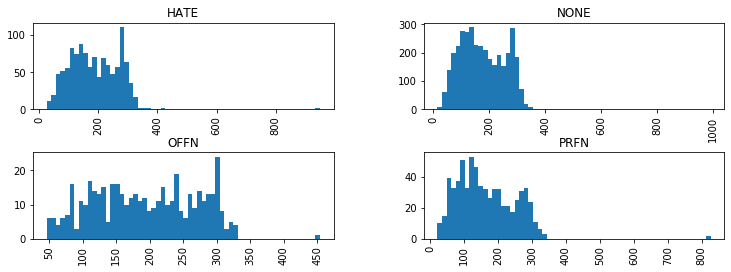

In [ ]:
dataset.hist(column = 'length', by = 'label', bins = 60, figsize = (12,4))

In [ ]:
import string

In [ ]:
speech = r"#DhoniKeepsTheGlove | WATCH: Sports Minister Kiren Rijiju issues statement backing MS Dhoni over 'Balidaan Badge', tells BCCI to take up the matter with ICC and keep government in the know as nation's pride is involved    https://t.co/zuo5335Rjr"

In [ ]:
speech

"#DhoniKeepsTheGlove | WATCH: Sports Minister Kiren Rijiju issues statement backing MS Dhoni over 'Balidaan Badge', tells BCCI to take up the matter with ICC and keep government in the know as nation's pride is involved    https://t.co/zuo5335Rjr"

In [ ]:
no_punctuation = [c for c in speech if c not in string.punctuation]

In [ ]:
no_punctuation

['D',
 'h',
 'o',
 'n',
 'i',
 'K',
 'e',
 'e',
 'p',
 's',
 'T',
 'h',
 'e',
 'G',
 'l',
 'o',
 'v',
 'e',
 ' ',
 ' ',
 'W',
 'A',
 'T',
 'C',
 'H',
 ' ',
 'S',
 'p',
 'o',
 'r',
 't',
 's',
 ' ',
 'M',
 'i',
 'n',
 'i',
 's',
 't',
 'e',
 'r',
 ' ',
 'K',
 'i',
 'r',
 'e',
 'n',
 ' ',
 'R',
 'i',
 'j',
 'i',
 'j',
 'u',
 ' ',
 'i',
 's',
 's',
 'u',
 'e',
 's',
 ' ',
 's',
 't',
 'a',
 't',
 'e',
 'm',
 'e',
 'n',
 't',
 ' ',
 'b',
 'a',
 'c',
 'k',
 'i',
 'n',
 'g',
 ' ',
 'M',
 'S',
 ' ',
 'D',
 'h',
 'o',
 'n',
 'i',
 ' ',
 'o',
 'v',
 'e',
 'r',
 ' ',
 'B',
 'a',
 'l',
 'i',
 'd',
 'a',
 'a',
 'n',
 ' ',
 'B',
 'a',
 'd',
 'g',
 'e',
 ' ',
 't',
 'e',
 'l',
 'l',
 's',
 ' ',
 'B',
 'C',
 'C',
 'I',
 ' ',
 't',
 'o',
 ' ',
 't',
 'a',
 'k',
 'e',
 ' ',
 'u',
 'p',
 ' ',
 't',
 'h',
 'e',
 ' ',
 'm',
 'a',
 't',
 't',
 'e',
 'r',
 ' ',
 'w',
 'i',
 't',
 'h',
 ' ',
 'I',
 'C',
 'C',
 ' ',
 'a',
 'n',
 'd',
 ' ',
 'k',
 'e',
 'e',
 'p',
 ' ',
 'g',
 'o',
 'v',
 'e',
 'r',
 'n',
 'm'

In [ ]:
no_punctuation = ''.join(no_punctuation)

In [ ]:
no_punctuation

'DhoniKeepsTheGlove  WATCH Sports Minister Kiren Rijiju issues statement backing MS Dhoni over Balidaan Badge tells BCCI to take up the matter with ICC and keep government in the know as nations pride is involved    httpstcozuo5335Rjr'

In [ ]:
from nltk.corpus import stopwords

In [ ]:
clean_speech = [words for words in no_punctuation.split() if words.lower() not in stopwords.words('english')]

In [ ]:
clean_speech

['DhoniKeepsTheGlove',
 'WATCH',
 'Sports',
 'Minister',
 'Kiren',
 'Rijiju',
 'issues',
 'statement',
 'backing',
 'MS',
 'Dhoni',
 'Balidaan',
 'Badge',
 'tells',
 'BCCI',
 'take',
 'matter',
 'ICC',
 'keep',
 'government',
 'know',
 'nations',
 'pride',
 'involved',
 'httpstcozuo5335Rjr']

In [ ]:
def text_process(speech):
    no_punctuation = [c for c in speech if c not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [words for words in no_punctuation.split() if words.lower() not in stopwords.words('english')]

In [ ]:
dataset['speech'].head(5).apply(text_process)

0    [DhoniKeepsTheGlove, WATCH, Sports, Minister, ...
1    [politico, remember, clearly, Individual1, adm...
2    [cricketworldcup, Guess, would, winner, CWC19,...
3    [Corbyn, politically, intellectual, BorisJohns...
4    [best, TeamIndia, another, swimming, competiti...
Name: speech, dtype: object

In [ ]:
from nltk.stem import WordNetLemmatizer

In [ ]:
lemmatizer = WordNetLemmatizer()

In [ ]:
def text_process(speech):
    no_punctuation = [c for c in speech if c not in string.punctuation]
    no_punctuation = ''.join(no_punctuation)
    return [lemmatizer.lemmatize(word) for word in no_punctuation.split() if word.lower() not in set(stopwords.words('english'))]

In [ ]:
dataset['speech'].head(5).apply(text_process)

0    [DhoniKeepsTheGlove, WATCH, Sports, Minister, ...
1    [politico, remember, clearly, Individual1, adm...
2    [cricketworldcup, Guess, would, winner, CWC19,...
3    [Corbyn, politically, intellectual, BorisJohns...
4    [best, TeamIndia, another, swimming, competiti...
Name: speech, dtype: object

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
bow_transformer = CountVectorizer(analyzer= text_process).fit(dataset['speech'])

In [ ]:
print(len(bow_transformer.vocabulary_))

24387


In [ ]:
speeches_bow = bow_transformer.transform(dataset['speech'])

In [ ]:
speeches_bow.shape

(5852, 24387)

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
tfidftransformer = TfidfTransformer().fit(speeches_bow)

In [ ]:
speeches_tfidf = tfidftransformer.transform(speeches_bow)

In [ ]:
pd.DataFrame(speeches_tfidf)[0]

0         (0, 22324)\t0.1780907226720076\n  (0, 22236)...
1         (0, 22684)\t0.30413933491184775\n  (0, 20803...
2         (0, 24206)\t0.36529286804580274\n  (0, 23541...
3         (0, 23234)\t0.29050505231751333\n  (0, 20112...
4         (0, 23966)\t0.33945966226132074\n  (0, 22190...
                              ...                        
5847      (0, 23507)\t0.2020527747437349\n  (0, 23492)...
5848      (0, 20687)\t0.4565662496998868\n  (0, 18613)...
5849      (0, 22320)\t0.2732704167770385\n  (0, 19952)...
5850      (0, 22354)\t0.2494586326529771\n  (0, 20618)...
5851      (0, 19308)\t0.2887261220032217\n  (0, 17105)...
Name: 0, Length: 5852, dtype: object

In [ ]:
from sklearn.naive_bayes import MultinomialNB, GaussianNB

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
from sklearn import svm

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
y = pd.get_dummies(dataset['label'])

In [ ]:
y = y['HATE']
print(y)

0       0
1       1
2       0
3       0
4       0
       ..
5847    0
5848    0
5849    0
5850    0
5851    0
Name: HATE, Length: 5852, dtype: uint8


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataset['speech'], dataset['label'], test_size=0.20, random_state=42)

In [ ]:
pipeline = Pipeline([
    ('bow_transformer',CountVectorizer(analyzer = text_process)),
    ('tfidftransformer', TfidfTransformer()),
    ('classifier',MultinomialNB())
])

In [ ]:
pipeline = Pipeline([
    ('bow_transformer',CountVectorizer(analyzer = text_process)),
    ('tfidftransformer', TfidfTransformer()),
    ('classifier',LogisticRegressionCV(multi_class = 'ovr',cv = 10))
])

In [ ]:
pipeline.fit(X_train,y_train)

C:\Users\muktadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\muktadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\muktadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\muktadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\muktadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\muktadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\muktadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\muktadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\muktadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\muktadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\muktadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\muktadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

C:\Users\muktadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\muktadir\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logist

Pipeline(memory=None,
         steps=[('bow_transformer',
                 CountVectorizer(analyzer=<function text_process at 0x00000261BD6B0048>,
                                 binary=False, decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(...
                 TfidfTransformer(norm='l2', smooth_idf=True,
                                  sublinear_tf=False, use_idf=True)),
                ('classifier',
                 LogisticRegressionCV(Cs=10, class_weight=None, cv=10,
                                      dual=False, fit_intercept=True,
                                      intercept_scaling=1.0, l1_

In [ ]:
test_data = pd.read_csv('test.csv')

In [ ]:
predictions = pipeline.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

        HATE       0.01      0.25      0.02         8
        NONE       0.97      0.65      0.78      1095
        OFFN       0.00      0.00      0.00         0
        PRFN       0.29      0.57      0.39        68

    accuracy                           0.64      1171
   macro avg       0.32      0.37      0.30      1171
weighted avg       0.92      0.64      0.75      1171



C:\Users\muktadir\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
print(confusion_matrix(predictions, y_test))

[[  2   1   4   1]
 [209 709  84  93]
 [  0   0   0   0]
 [  1  24   4  39]]


In [ ]:
predictions = pipeline.predict(test_data['speech'])

In [ ]:
ct = 0
for each in predictions:
    if each == 'HATE':
        print(test_data['speech'][ct])
    
    ct = ct + 1

68.5 million people have been forced to leave their homes.      Read more: https://wef.ch/2YQcwpk  #refugees #society
Sure this has nothing to do with Boris wanting to prorogue parliament, it would be to his advantage to get the Executive in Northern Ireland up and running ASAP
Agree with your latter points completely, but I don't think he likes negative attention, too much of an egotist.
Why did Boris take Rudd and Morgan+ other Remainers into cabinet, I don’t trust Boris at all.  If people leave the @brexitparty_uk for this charlatan Boris and the CONs, they will never get another chance to leave support a genuine leave party @brexitparty_uk
I was going to comment but then I see that you're a bot ...soooooo never mind.    #fucktRump   #veteransagainsttRump
Muslim Migrants Attack Jewish Student Wearing Kippah in Germany - Geller Report News 
The reason I prefer to step out to shop not to this bull shot e-commerce.  Please execute delivery to a Muslim customer through a Balmiki person 